# Basic Plotting with matplotlib
You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands.
`%matplotlib notebook` provides an interactive environment.

In [1]:
%matplotlib inline
import matplotlib as mpl
print(mpl.get_backend())
import matplotlib.pyplot as plt
plt.plot?

module://matplotlib_inline.backend_inline


Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

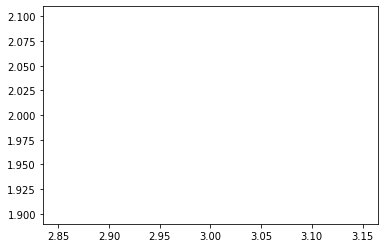

In [2]:
# Because the default is the line style '-', nothing will be shown if we only pass in one point (3, 2)
plt.plot(3, 2)

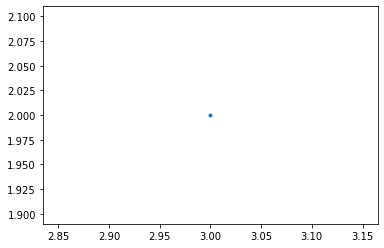

In [3]:
# we can pass in '.' to plt.plot to indicate that we want the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer. First let´s set the backend without using mpl.use() from the scripting layer

In [4]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure() # Create a new figure
canvas = FigureCanvasAgg(fig) # associate fig with the backend
ax = fig.add_subplot(111) # add a subplot to the fig
ax.plot(3, 2, '.') # plot the point (3, 2)
canvas.print_png('test.png') # save the figure to test.png

In [5]:
%%html
<img src='test.png' /> # Use Html to show image

(0.0, 6.0, 0.0, 10.0)

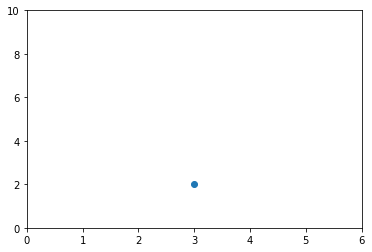

In [6]:
plt.figure() # create a new figure
plt.plot(3, 2, 'o') # plot the point (3, 2) using the circle marker
ax = plt.gca() # get the current axes
ax.axis([0, 6, 0, 10]) # Set axis properties [xmin, xmax, ymin, ymax]

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

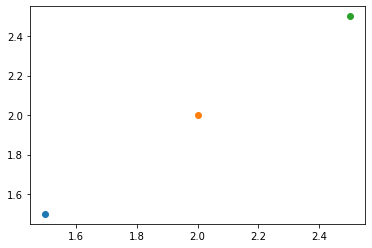

In [7]:
plt.figure() # create a new figure
plt.plot(1.5, 1.5, 'o') # plot the point (1.5, 1.5) using the circle marker
plt.plot(2, 2, 'o') # plot the point(2, 2) using the circule marker
plt.plot(2.5, 2.5, 'o') # plot the point (2.5, 2.5) using the circle marker
ax = plt.gca() # get current axes
ax.get_children()

## Scatterplots

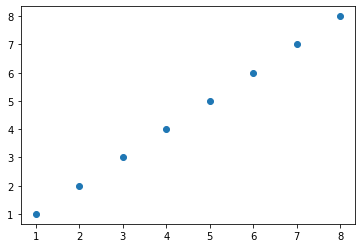

In [8]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x
plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

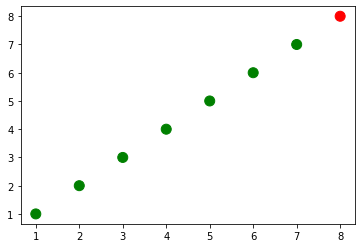

In [9]:
colors = ['green']*(len(x)-1)
colors.append('red')
plt.figure()
plt.scatter(x, y, s = 100, c = colors) # Plot the point with size 100 and chosen colors

In [10]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10]) # convert the two lists into a list of pairwise tuples
print(list(zip_generator))
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
print(*zip_generator) # The single * unpacks a collection into positional arguments
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
x, y = zip(*zip_generator) # Let's turn the data back into 2 lists
print(x)
print(y)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)
[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


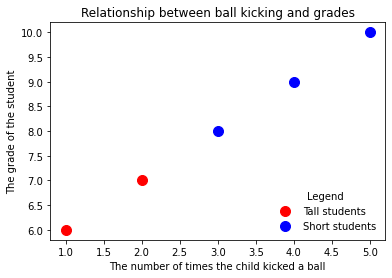

In [11]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s = 100, c = 'red', label = 'Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y
plt.scatter(x[2:], y[2:], s = 100, c = 'blue', label = 'Short students')
plt.xlabel('The number of times the child kicked a ball') # add a label to the x axis
plt.ylabel('The grade of the student') # add a label to the y axis
plt.title('Relationship between ball kicking and grades') # add a title
plt.legend() # Add a legen (uses the labels from plt.scatter)
plt.legend(loc = 4, frameon = False, title = 'Legend') # add the legend to loc=4 (The lower right hand corner), also gets rid of the frame and adds a title

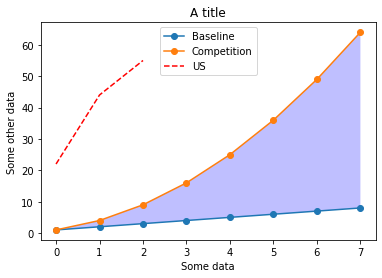

In [21]:
# Line Plots
linear_data = np.array([1, 2, 3, 4, 5 ,6 ,7 , 8])
exponential_data = linear_data**2
plt.figure()
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22, 44, 55], '--r')
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'US'])
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

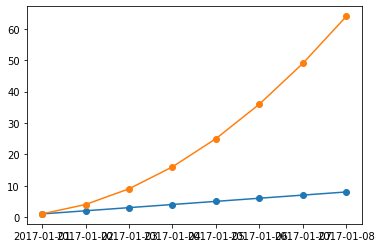

In [26]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')

Text(0.5, 1.0, 'Exponential ($x^2$) vs. Linear ($x$) performance')

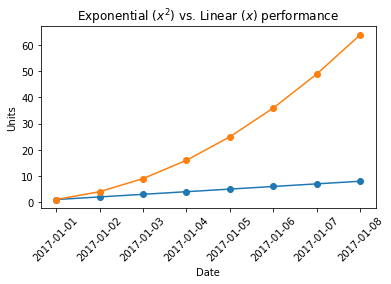

In [ ]:
import pandas as pd

plt.figure()
observations_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observations_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.subplots_adjust(bottom=0.25)
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

## Bar Charts

<BarContainer object of 8 artists>

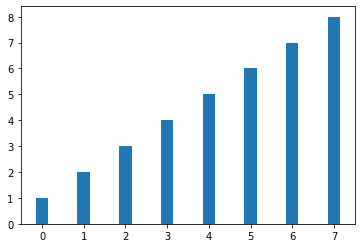

In [32]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

<BarContainer object of 8 artists>

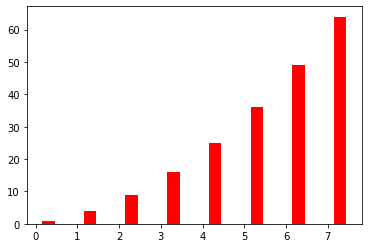

In [33]:
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)
    
plt.bar(new_xvals, exponential_data, width = 0.3, color = 'red')

<BarContainer object of 8 artists>

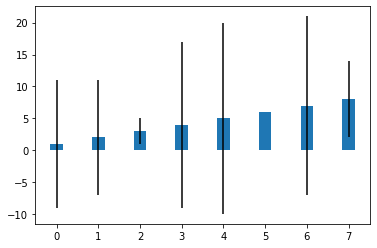

In [34]:
from random import randint
linear_err = [randint(0, 15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width = 0.3, yerr = linear_err)

<BarContainer object of 8 artists>

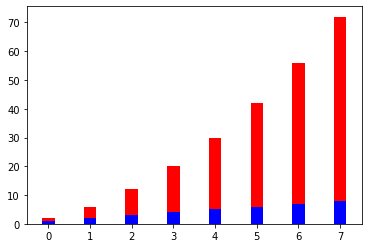

In [36]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color = 'b')
plt.bar(xvals, exponential_data, width = 0.3, bottom = linear_data, color = 'r')

<BarContainer object of 8 artists>

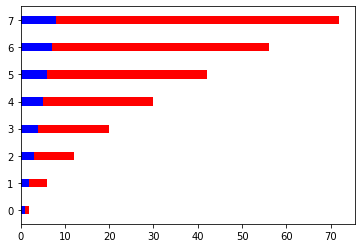

In [37]:
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color = 'b')
plt.barh(xvals, exponential_data, height = 0.3, left = linear_data, color = 'r')

## Subplots

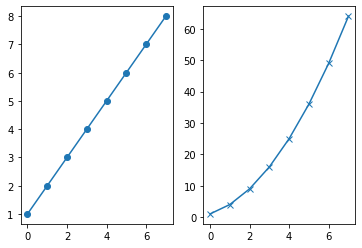

In [41]:
plt.figure()
plt.subplot(1, 2, 1)
linear_data = np.array([1, 2, 3, 4, 5, 6, 7 ,8])
plt.plot(linear_data, '-o')
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-x')

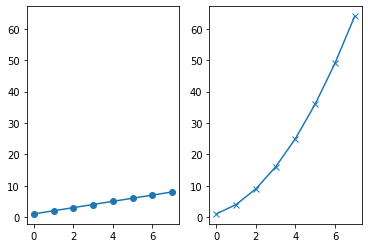

In [43]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.plot(exponential_data, '-x')

True


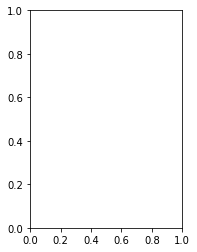

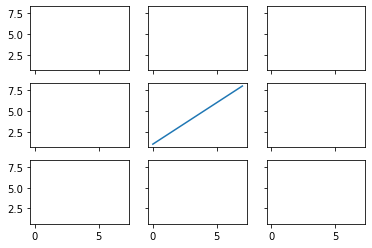

In [49]:
plt.figure()
# The right hand side is equivalent shorthand syntax
print(plt.subplot(1,2,1) == plt.subplot(121))
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex = True, sharey = True)
# plot the linear_data on the 5th subplot axes
ax5.plot(linear_data, '-')
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

plt.gcf().canvas.draw()

## Histograms

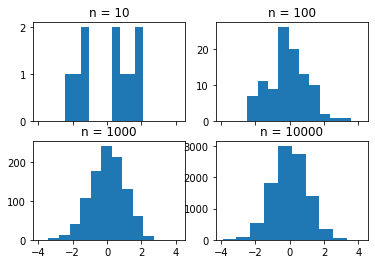

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n = {}'.format(sample_size))

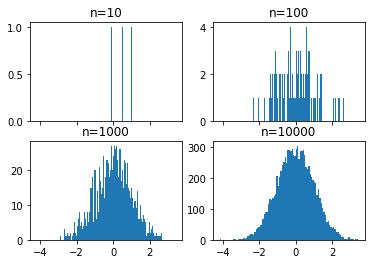

In [52]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

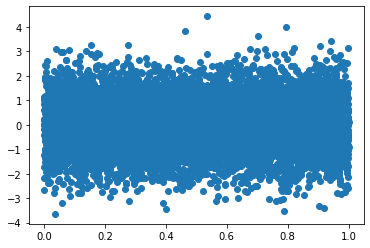

In [53]:
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
plt.scatter(X, Y)

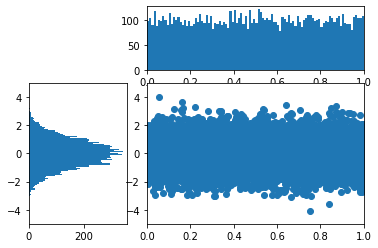

In [60]:
# Use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(3, 3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins = 100)
s = side_histogram.hist(Y, bins = 100, orientation = 'horizontal')
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

## Box and Whisker Plots

In [62]:
import pandas as pd
normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2, size = 10000)

df = pd.DataFrame({'normal' : normal_sample,
                   'random' : random_sample,
                   'gamma' : gamma_sample})
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.003668,0.499887,1.984485
std,0.995000,0.288088,1.400344
min,-3.919279,0.000137,0.012035
25%,-0.663099,0.251599,0.945806
50%,0.006703,0.502246,1.670527
75%,0.661217,0.749463,2.669868
max,3.834649,0.999699,10.852741


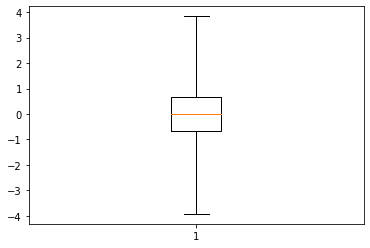

In [75]:
plt.figure()
# create a boxplot of the norma data, assign the output ot a varible to supress output
_ = plt.boxplot(df['normal'], whis = (0, 100))

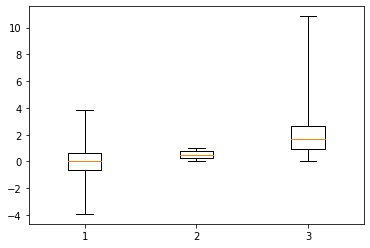

In [76]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis = (0, 100))

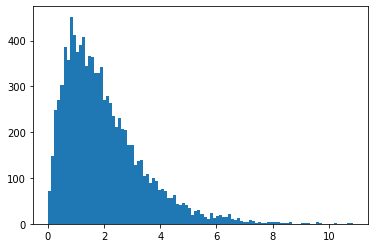

In [70]:
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

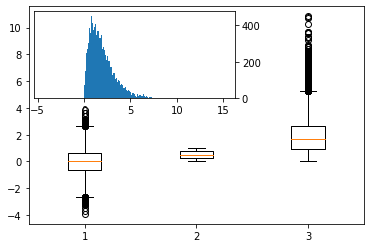

In [72]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis = (0, 100))
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

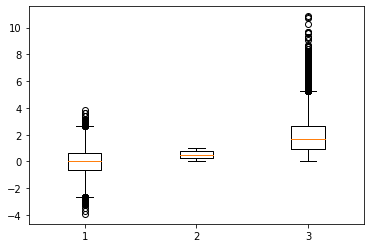

In [77]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

## Heatmaps

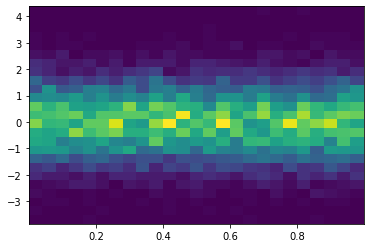

In [78]:
plt.figure
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
_ = plt.hist2d(X, Y, bins = 25)

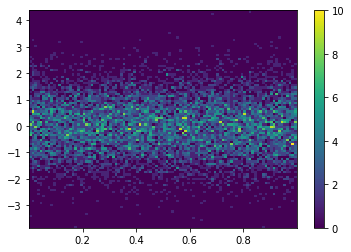

In [81]:
plt.figure()
_ = plt.hist2d(X, Y, bins = 100)
plt.colorbar()

## Animations

In [82]:
import matplotlib.animation as animation
n = 100
x = np.random.randn(n)
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if the animation is at the last frame, and if so, stop the animation
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins = bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title("Sampling the Normal Distribution")
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'. format(curr), [3, 27])

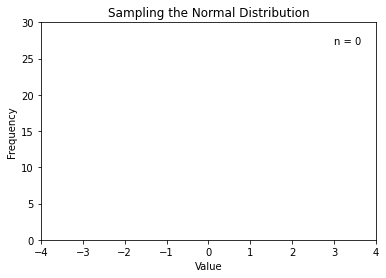

In [86]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 100)

## Interactivity